<a href="https://colab.research.google.com/github/mgbn01/projetos/blob/main/Analisando_os_Dados_do_Airbnb_Edinburgh_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by Manoel Gomes*

---

# Análise dos Dados do Airbnb - *Edinburgh*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Edinburgh
, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2023-06-12/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* **id** - numero de id gerado para identificar o imovel
* **name** - nome da propriedade
* **host_id** - numero de id do proprietario do imovel
* **host_name** - nome do proprietario
* **neighbourhood_group** - essa coluna nao contem nenhum valor valido
* **neighbourhood** - nome do bairro
* **latitude** - coordenadas de latitude
* **longitude** - coordenadas de longetude
* **room_type** - informa o tipo do quarto oferecido
* **price** - preco da diaria do imovel
* **minimum_nights** - noites minimas disponiveis no imovel
* **number_of_reviews** - numeros de review que o imovel possui
* **last_review** - data do ultimo review
* **review_per_month** - numero de reviews no mes
* **calculated_host_listings_count** - quantidade de imoveis do mesmo proprietario
* **availability_365** - numero de dias disponiveis dentro do ano


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Rental unit in Edinburgh · ★4.98 · 1 bedroom ·...,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.957590,-3.188050,Entire home/apt,126,3,492,2023-06-11,3.26,1,39,81,NaN
1,24288,Loft in Edinburgh · ★4.62 · 2 bedrooms · 2 bed...,46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.944983,-3.185293,Entire home/apt,95,3,274,2023-05-29,1.77,1,46,46,NaN
2,450745,Rental unit in Edinburgh · ★4.96 · 2 bedrooms ...,2238338,Jen,NaN,"Canongate, Southside and Dumbiedykes",55.943081,-3.178438,Entire home/apt,177,2,194,2023-06-09,2.59,1,68,42,NaN
3,458510,Rental unit in Edinburgh · ★4.86 · 1 bedroom ·...,2280137,Gill,NaN,Deans Village,55.952960,-3.205370,Entire home/apt,117,4,267,2023-06-08,1.99,12,86,35,NaN
4,44552,Condo in Edinburgh · ★4.75 · 1 bedroom · 1 bed...,195950,Shaun,NaN,South Leith,55.966120,-3.171840,Private room,48,4,267,2023-05-28,1.71,1,10,40,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* que baixamos e a versao "resumida" do Airbnb. Na mesma pagina que baixamos o arquivo listings.csv , Ha uma versao mais completa com 7698 entradas e 18 variaveis ( listings.csv.gz )

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 7698
Variaveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
  A qualidade de um dataset esta relacionada a quantidade de valores ausentes , e importante entender se esses valores nulos sao significativos comparados ao total de entradas.

  * As colunas *neighbourhood_group* e *License* possui 100% dos seus valores faltantes.
  * As variaveis *reviews_per_month* e *last_review* possuem 10% de valores ausentes.
  * A variavel *host_name* tem 0,2% de valores ausentes.
  

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.996622
reviews_per_month                 0.107690
last_review                       0.107690
host_name                         0.000260
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**
  Segue o plot do histograma para identificar a distribuicao das variaveis.

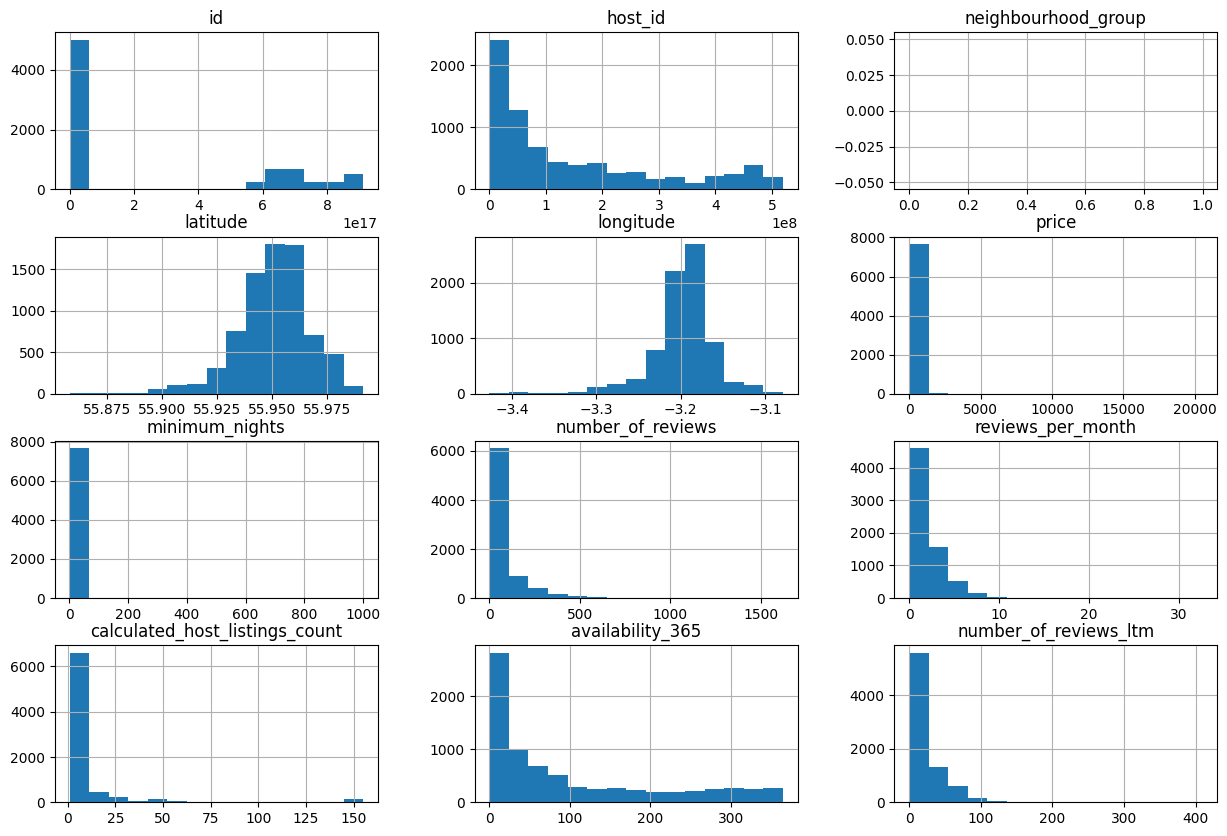

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15 , figsize =(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
df.price.describe()

count     7698.000000
mean       182.389452
std        440.333027
min          0.000000
25%         81.000000
50%        130.000000
75%        198.000000
max      20551.000000
Name: price, dtype: float64

In [ ]:
# ver a média da coluna `price``
df.price.mean()

182.3894518056638

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price' , 'minimum_nights' , 'number_of_reviews' , 'reviews_per_month' , 'calculated_host_listings_count' , 'availability_365']].corr()

# mostrar a matriz de correlação

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.029859,-0.093228,-0.106132,0.085342,0.173444
minimum_nights,-0.029859,1.000000,-0.075170,-0.162118,-0.036181,-0.055791
number_of_reviews,-0.093228,-0.075170,1.000000,0.609340,-0.054722,-0.051461
reviews_per_month,-0.106132,-0.162118,0.609340,1.000000,-0.025518,0.034742
calculated_host_listings_count,0.085342,-0.036181,-0.054722,-0.025518,1.000000,0.231640
availability_365,0.173444,-0.055791,-0.051461,0.034742,0.231640,1.000000


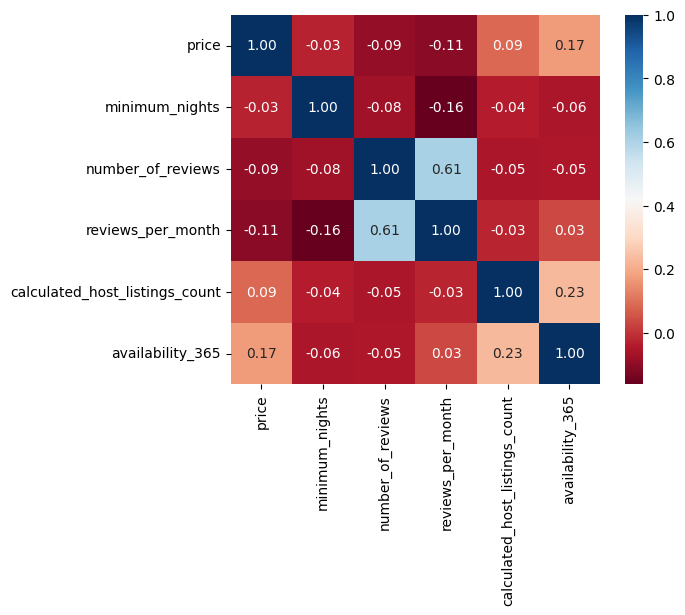

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu' , fmt='.2f' , square=True, linecolor='white' , annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5342
Private room       2243
Hotel room           32
Shared room          17
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.699764
Private room       0.293817
Hotel room         0.004192
Shared room        0.002227
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Oxgangs                                      362.875000
The Calders                                  278.857143
Carrick Knowe                                243.285714
New Town West                                234.153846
Duddingston and Portobello South             224.900000
South Gyle                                   215.740741
Old Town, Princes Street and Leith Street    214.869619
East Craigs South                            214.000000
Morningside                                  212.072727
Canonmills and New Town North                211.425197
Name: price, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

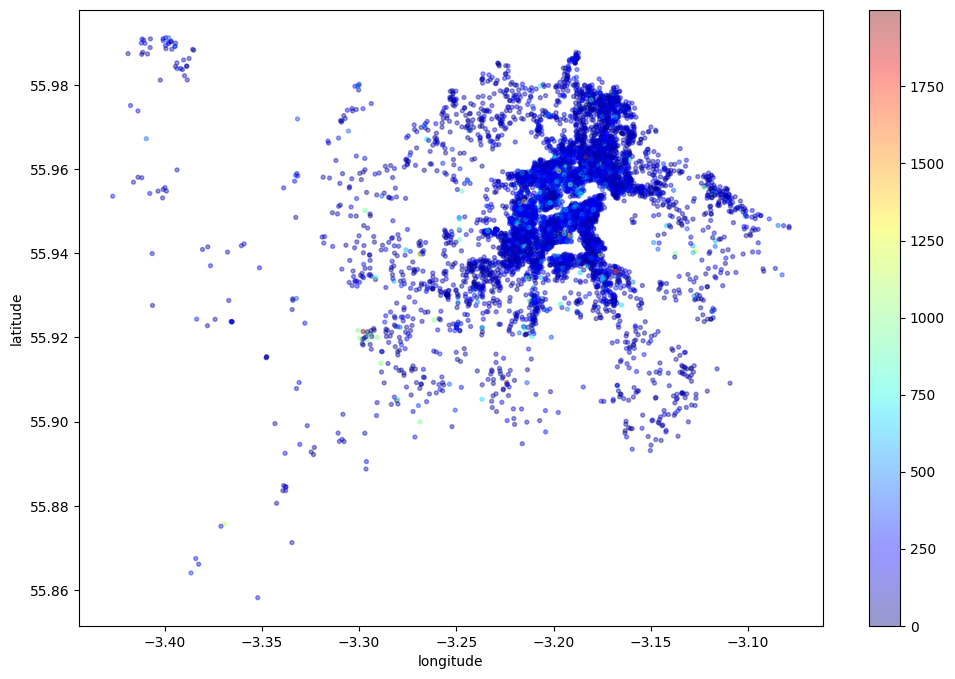

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter" , x='longitude' , y='latitude' , alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

4.173161860223435

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.

